# geant4-python 

In [1]:
import numpy as np
import pandas as pd
from IPython.display import Image
%matplotlib inline
import Geant4 as g4
from Geant4 import *
from  g4py import NISTmaterials
# g4py是预先定义好的一系列几何、物理、粒子枪等，目录位于 g4py/site-module
import g4py.ParticleGun
import g4py.Qmaterials
import g4py.ezgeom as ezgeom


*************************************************************
 Geant4 version Name: geant4-10-02-patch-02    (17-June-2016)
                      Copyright : Geant4 Collaboration
                      Reference : NIM A 506 (2003), 250-303
                            WWW : http://cern.ch/geant4
*************************************************************

Visualization Manager instantiating with verbosity "warnings (3)"...


In [2]:
print gRunManager.GetVersionString()

 Geant4 version Name: geant4-10-02-patch-02    (17-June-2016)


In [3]:
%load_ext version_information 
#需要pip安装
%version_information matplotlib, numpy, pandas, Geant4

Software versions
Python 2.7.12 64bit [GCC 5.4.0 20160609]
IPython 5.1.0
OS Linux 4.4.0 38 generic x86_64 with Ubuntu 16.04 xenial
matplotlib 1.5.3
numpy 1.11.1
pandas 0.18.1
Geant4 10.2
Thu Sep 29 11:15:21 2016 CST

In [4]:
help(g4)

Help on package Geant4:

NAME
    Geant4

FILE
    /home/inat/APP/G4/g4py/lib/Geant4/__init__.py

DESCRIPTION
    # ==================================================================
    #  [Geant4] module package
    #
    #  Welcome to Geant4Py.
    #
    #  This package contains a set of Python interface with Geant4.
    # ==================================================================

PACKAGE CONTENTS
    G4digits_hits
    G4event
    G4gdml
    G4geometry
    G4global
    G4graphics_reps
    G4intercoms
    G4interface
    G4materials
    G4particles
    G4physicslists
    G4processes
    G4run
    G4track
    G4tracking
    G4visualization
    colortable
    g4thread
    g4viscp
    hepunit

FUNCTIONS
    ApplyUICommand(...)
        ApplyUICommand( (G4String)arg1) -> int :
        
            C++ signature :
                int ApplyUICommand(G4String)
        
        ApplyUICommand( (object)arg1) -> int :
        
            C++ signature :
                int ApplyUIComm

In [5]:
g4py.NISTmaterials.Construct()
print g4.gMaterialTable
#print Geant4.gElementTable


***** Table : Nb of materials = 18 *****

 Material:  _Vacuum    density:  0.000 kg/m3   RadL: 119194484.658 pc   Nucl.Int.Length: 277024008.352 pc 
                       Imean:  85.703 eV   temperature: 293.15 K  pressure:   1.00 atm

   --->  Element: _N (N)   Z =  7.0   N =    14   A = 14.007 g/mole
         --->  Isotope:   N14   Z =  7   N =  14   A =  14.00 g/mole   abundance: 99.632 %
         --->  Isotope:   N15   Z =  7   N =  15   A =  15.00 g/mole   abundance:  0.368 %
          ElmMassFraction:  70.00 %  ElmAbundance  72.72 % 

   --->  Element: _O (O)   Z =  8.0   N =    16   A = 15.999 g/mole
         --->  Isotope:   O16   Z =  8   N =  16   A =  15.99 g/mole   abundance: 99.757 %
         --->  Isotope:   O17   Z =  8   N =  17   A =  17.00 g/mole   abundance:  0.038 %
         --->  Isotope:   O18   Z =  8   N =  18   A =  18.00 g/mole   abundance:  0.205 %
          ElmMassFraction:  30.00 %  ElmAbundance  27.28 % 


 Material:    G4_Al    density:  2.699 g/cm3   R

In [6]:
class MyDetectorConstruction(G4VUserDetectorConstruction):
    "My Detector Construction"

    def __init__(self):

        G4VUserDetectorConstruction.__init__(self)
        
        
        self.solid = {}
        self.logical = {}
        self.physical = {}
       

        self.create_world(side = 4000,
                          material = "G4_AIR")
        
        self.create_cylinder(name = "vacuum", 
                             radius = 200,
                             length = 320,
                             translation = [0,0,900],
                             material = "G4_Galactic",
                             colour = [1.,1.,1.,0.1],
                             mother = 'world')
        
        self.create_cylinder(name = "upper_scatter", 
                             radius = 10,
                             length = 0.01,
                             translation = [0,0,60],
                             material = "G4_Ta",
                             colour = [1.,1.,1.,0.7],
                             mother = 'vacuum')
        
        self.create_cylinder(name = "lower_scatter", 
                             radius = 30,
                             length = 0.01,
                             translation = [0,0,20],
                             material = "G4_Al",
                             colour = [1.,1.,1.,0.7],
                             mother = 'vacuum')
        
        self.create_applicator_aperture(name = "apature_1",
                                        inner_side = 142,
                                        outer_side = 182,
                                        thickness = 6,
                                        translation = [0,0,449],
                                        material = "G4_Fe",
                                        colour = [1,1,1,0.7],
                                        mother = 'world')
        
        self.create_applicator_aperture(name = "apature_2",
                                        inner_side = 130,
                                        outer_side = 220,
                                        thickness = 12,
                                        translation = [0,0,269],
                                        material = "G4_Fe",
                                        colour = [1,1,1,0.7],
                                        mother = 'world')
        
        self.create_applicator_aperture(name = "apature_3",
                                        inner_side = 110,
                                        outer_side = 180,
                                        thickness = 12,
                                        translation = [0,0,140],
                                        material = "G4_Fe",
                                        colour = [1,1,1,0.7],
                                        mother = 'world')
        
        self.create_applicator_aperture(name = "apature_4",
                                        inner_side = 100,
                                        outer_side = 140,
                                        thickness = 12,
                                        translation = [0,0,59],
                                        material = "G4_Fe",
                                        colour = [1,1,1,0.7],
                                        mother = 'world')
        
        self.create_applicator_aperture(name = "cutout",
                                        inner_side = 100,
                                        outer_side = 120,
                                        thickness = 6,
                                        translation = [0,0,50],
                                        material = "G4_Fe",
                                        colour = [1,1,1,0.7],
                                        mother = 'world')
        
        self.create_cube(name = "phantom",
                         side = 500,
                         translation = [0,0,-250],
                         material = "G4_WATER",
                         colour = [0,0,1,0.4],
                         mother = 'world')
    
 
    
    def create_world(self, **kwargs):
        
        material = gNistManager.FindOrBuildMaterial(kwargs['material'])
        side = kwargs['side']
        
        self.solid['world'] = G4Box("world", side/2., side/2., side/2.)
        
        self.logical['world'] = G4LogicalVolume(self.solid['world'], 
                                                material, 
                                                "world")
        
        self.physical['world'] = G4PVPlacement(G4Transform3D(), 
                                               self.logical['world'], 
                                               "world", None, False, 0)

        visual = G4VisAttributes()
        visual.SetVisibility(False)
        
        self.logical['world'].SetVisAttributes(visual)
        
    
    
    def create_cylinder(self, **kwargs):
        
        name = kwargs['name']
        radius = kwargs['radius']
        length = kwargs['length']
        translation = G4ThreeVector(*kwargs['translation'])
        material = gNistManager.FindOrBuildMaterial(kwargs['material'])
        visual = G4VisAttributes(G4Color(*kwargs['colour']))
        mother = self.physical[kwargs['mother']]
        
        
        self.solid[name] = G4Tubs(name, 0., radius, length/2., 0., 2*pi)
        
        self.logical[name] = G4LogicalVolume(self.solid[name], 
                                             material,
                                             name)
        
        self.physical[name] = G4PVPlacement(None, translation, 
                                            name, 
                                            self.logical[name],
                                            mother, False, 0)

        self.logical[name].SetVisAttributes(visual)
    
    
    def create_cube(self, **kwargs):
        
        name = kwargs['name']
        side = kwargs['side']
        translation = G4ThreeVector(*kwargs['translation'])
        material = gNistManager.FindOrBuildMaterial(kwargs['material'])
        visual = G4VisAttributes(G4Color(*kwargs['colour']))
        mother = self.physical[kwargs['mother']]
        
        self.solid[name] = G4Box(name, side/2., side/2., side/2.)
        
        self.logical[name] = G4LogicalVolume(self.solid[name], 
                                             material,
                                             name)
        
        self.physical[name] = G4PVPlacement(None, translation, 
                                            name, 
                                            self.logical[name],
                                            mother, False, 0)

        self.logical[name].SetVisAttributes(visual)
    
    
    def create_applicator_aperture(self, **kwargs):
        
        name = kwargs['name']
        inner_side = kwargs['inner_side']
        outer_side = kwargs['outer_side']
        thickness = kwargs['thickness']
        translation = G4ThreeVector(*kwargs['translation'])
        material = gNistManager.FindOrBuildMaterial(kwargs['material'])
        visual = G4VisAttributes(G4Color(*kwargs['colour']))
        mother = self.physical[kwargs['mother']]
        
        
        inner_box = G4Box("inner", inner_side/2., inner_side/2., thickness/2. + 1)
        outer_box = G4Box("outer", outer_side/2., outer_side/2., thickness/2.)

        
        self.solid[name] = G4SubtractionSolid(name, 
                                              outer_box, 
                                              inner_box)
        
        self.logical[name] = G4LogicalVolume(self.solid[name], 
                                             material,
                                             name)
        
        self.physical[name] = G4PVPlacement(None, 
                                            translation,
                                            name, 
                                            self.logical[name],
                                            mother, False, 0)

        self.logical[name].SetVisAttributes(visual)
        
        

    # -----------------------------------------------------------------
    def Construct(self): # return the world volume
        
        return self.physical['world'] 

In [7]:
# set geometry
detector = MyDetectorConstruction()
gRunManager.SetUserInitialization(detector)
print gRunManager.GetUserDetectorConstruction()

In [8]:
# set physics list
physics_list = FTFP_BERT()
gRunManager.SetUserInitialization(physics_list)
print gRunManager.GetUserPhysicsList()

<<< Geant4 Physics List simulation engine: FTFP_BERT 2.0



In [9]:
class MyPrimaryGeneratorAction(G4VUserPrimaryGeneratorAction):
    "My Primary Generator Action"

    def __init__(self):
        
        G4VUserPrimaryGeneratorAction.__init__(self)
        
        particle_table = G4ParticleTable.GetParticleTable()

        electron = particle_table.FindParticle(G4String("e-"))
        positron = particle_table.FindParticle(G4String("e+"))
        gamma = particle_table.FindParticle(G4String("gamma"))
        
        beam = G4ParticleGun()
        beam.SetParticleEnergy(6*MeV)
        beam.SetParticleMomentumDirection(G4ThreeVector(0,0,-1))
        beam.SetParticleDefinition(electron)
        beam.SetParticlePosition(G4ThreeVector(0,0,1005))
        
        self.particleGun = beam

        
    def GeneratePrimaries(self, event):
        
        self.particleGun.GeneratePrimaryVertex(event)


In [12]:
# set primary generator
primary_generator_action = MyPrimaryGeneratorAction()
gRunManager.SetUserAction(primary_generator_action)
print gRunManager.GetUserPrimaryGeneratorAction()

In [13]:
# Initialise
gRunManager.Initialize()

In [14]:
%%file ./raytrace.mac

/vis/open RayTracer
/vis/rayTracer/headAngle 340.
/vis/rayTracer/eyePosition 200 200 250  cm
/vis/rayTracer/trace world.jpg

Overwriting ./raytrace.mac


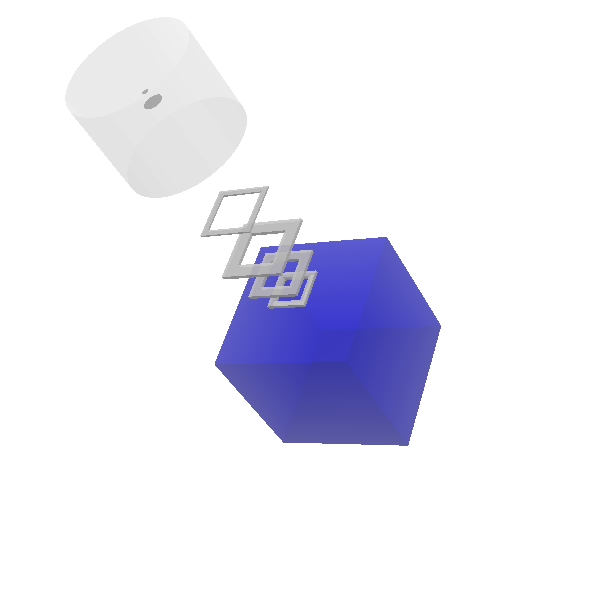

In [15]:
gUImanager.ExecuteMacroFile('raytrace.mac')

# Show image
Image(filename="world.jpg")

In [16]:
# visualization 
# OGLSX, VRML and HEPREP sceneHandlers are all created with names
gApplyUICommand("/vis/sceneHandler/create OGLSX OGLSX")
gApplyUICommand("/vis/sceneHandler/create VRML2FILE VRML")
gApplyUICommand("/vis/sceneHandler/create HepRepFile HEPREP")

#  OGLSX is the default so, viewer is created and volume is drawn
gApplyUICommand("/vis/viewer/create OGLSX oglsxviewer")
gApplyUICommand("/vis/drawVolume")
gApplyUICommand("/vis/scene/add/trajectories")

gApplyUICommand("/tracking/storeTrajectory 1")
gApplyUICommand("/vis/scene/endOfEventAction accumulate")
gApplyUICommand("/vis/scene/endOfRunAction accumulate")
gApplyUICommand("/vis/viewer/select  oglsxviewer")
gApplyUICommand("/vis/viewer/set/viewpointThetaPhi 90 90")

/tracking/storeTrajectory 1
  Consider setting the up vector to obtain definable behaviour.
  Consider setting the up vector to obtain definable behaviour.
  Consider setting the up vector to obtain definable behaviour.
  Consider setting the up vector to obtain definable behaviour.


0

/tracking/storeTrajectory 2


In [17]:
gRunManager.BeamOn(50)


phot:   for  gamma    SubType= 12  BuildTable= 0
      LambdaPrime table from 200 keV to 10 TeV in 54 bins 
      ===== EM models for the G4Region  DefaultRegionForTheWorld ======
       PhotoElectric :  Emin=        0 eV    Emax=       10 TeV   AngularGenSauterGavrila  FluoActive

compt:   for  gamma    SubType= 13  BuildTable= 1
      Lambda table from 100 eV  to 1 MeV, 7 bins per decade, spline: 1
      LambdaPrime table from 1 MeV to 10 TeV in 49 bins 
      ===== EM models for the G4Region  DefaultRegionForTheWorld ======
       Klein-Nishina :  Emin=        0 eV    Emax=       10 TeV

conv:   for  gamma    SubType= 14  BuildTable= 1
      Lambda table from 1.022 MeV to 10 TeV, 20 bins per decade, spline: 1
      ===== EM models for the G4Region  DefaultRegionForTheWorld ======
        BetheHeitler :  Emin=        0 eV    Emax=       80 GeV
     BetheHeitlerLPM :  Emin=       80 GeV   Emax=       10 TeV

msc:   for e-    SubType= 10
      RangeFactor= 0.04, stepLimitType: 1, latD

/bin/sh: 1: dawn: not found
convert: unable to open image `world.eps': 没有那个文件或目录 @ error/blob.c/OpenBlob/2712.
convert: no images defined `world.png' @ error/convert.c/ConvertImageCommand/3210.
